<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import scipy.optimize as opt
import pylab as pl

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-06-29 18:27:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-06-29 18:27:56 (10.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0         --> 2020.1.1-0        anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

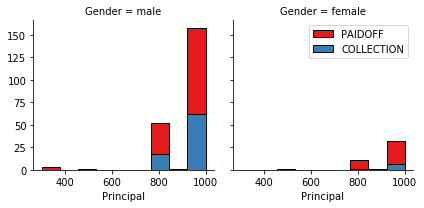

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

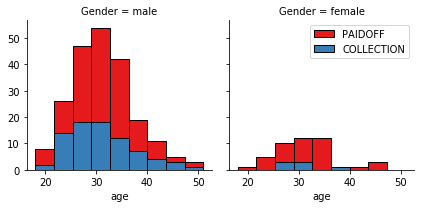

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

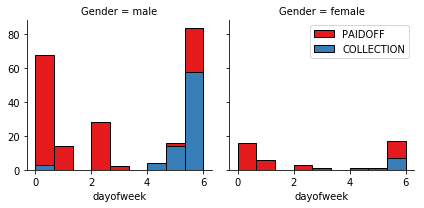

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [15]:
df.groupby(['effective_date'])['loan_status'].value_counts(normalize=True)

effective_date  loan_status
2016-09-08      PAIDOFF        1.000000
2016-09-09      COLLECTION     0.500000
                PAIDOFF        0.500000
2016-09-10      PAIDOFF        0.548387
                COLLECTION     0.451613
2016-09-11      PAIDOFF        0.608434
                COLLECTION     0.391566
2016-09-12      PAIDOFF        0.965517
                COLLECTION     0.034483
2016-09-13      PAIDOFF        1.000000
2016-09-14      PAIDOFF        1.000000
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [55]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature.shape
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()
#Feature.shape

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


### Feature selection

Lets defind feature sets, X:

In [56]:
#keep the features education in one column
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


What are our lables?

In [57]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [58]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

<h1> Logistic Regression 

<h3> Logistic Regression using the given model 

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)
LR

yhat = LR.predict(X_test)
yhat
print(X_test.shape)

yhat_prob = LR.predict_proba(X_test)
#print(yhat_prob)

from sklearn.metrics import jaccard_similarity_score
print("Jaccard Similarity:", jaccard_similarity_score(y_test, yhat))

print (classification_report(y_test, yhat))

from sklearn.metrics import log_loss
print("log loss: ", log_loss(y_test, yhat_prob))

Train set: (276, 9) (276,)
Test set: (70, 9) (70,)
(70, 9)
Jaccard Similarity: 0.6714285714285714
              precision    recall  f1-score   support

  COLLECTION       0.25      0.27      0.26        15
     PAIDOFF       0.80      0.78      0.79        55

   micro avg       0.67      0.67      0.67        70
   macro avg       0.52      0.52      0.52        70
weighted avg       0.68      0.67      0.68        70

log loss:  0.6710534031317325


<h3> Logistic regression using Masters and above data within the same column 

In [84]:
Feature = df[['Principal','terms','age','Gender','weekend', 'education']].values
Feature[0:5]
education = preprocessing.LabelEncoder()
education.fit(['Bechalor', 'High School or Below', 'Master or Above', 'college'])
Feature[:,5]=education.transform(Feature[:,5])
Feature[0:5]

X_train, X_test, y_train, y_test = train_test_split( Feature, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR1 = LogisticRegression(C=0.09, solver='liblinear').fit(X_train,y_train)
LR1

yhat = LR1.predict(X_test)
yhat

yhat_prob = LR1.predict_proba(X_test)
yhat_prob

from sklearn.metrics import jaccard_similarity_score
print("Jaccard Similarity:", jaccard_similarity_score(y_test, yhat))

print (classification_report(y_test, yhat))

from sklearn.metrics import log_loss
print("log loss: ", log_loss(y_test, yhat_prob))

Train set: (276, 6) (276,)
Test set: (70, 6) (70,)
Jaccard Similarity: 0.7714285714285715
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        15
     PAIDOFF       0.78      0.98      0.87        55

   micro avg       0.77      0.77      0.77        70
   macro avg       0.39      0.49      0.44        70
weighted avg       0.61      0.77      0.68        70

log loss:  0.5109868911447754


<h1> Conclusion: The best model is where education data has been considered within same columns including Masters and above data 

<h3>Logistic regression on loan_test data 

In [118]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
    
test_df = pd.read_csv('loan_test.csv')
test_df.head()

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df.head()

test_df['dayofweek'] = df['effective_date'].dt.dayofweek

test_df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

test = test_df[['Principal','terms','age','Gender','weekend']]
print(test.shape)
test.head()

test = test_df[['Principal','terms','age','Gender','weekend', 'education']].values
test[0:5]
education = preprocessing.LabelEncoder()
education.fit(['Bechalor', 'High School or Below', 'Master or Above', 'college'])
test[:,5]=education.transform(test[:,5])
#print(test[0:5])

#Feature = test_df[['Principal','terms','age','Gender','weekend']]
#Feature.shape
#Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
#Feature.head()
#Feature.shape
#test=Feature
#print(test.shape)


y_test1=test_df['loan_status']
y_test1[0:5]

yhat = LR1.predict(test)
yhat

yhat_prob = LR1.predict_proba(test)
yhat_prob

from sklearn.metrics import jaccard_similarity_score
print("Jaccard Similarity on test data:", jaccard_similarity_score(y_test1, yhat))

print (classification_report(y_test1, yhat))

from sklearn.metrics import log_loss
print("log loss on test data: ", log_loss(y_test1, yhat_prob))

f1= f1_score(y_test1, yhat, average='weighted')
print("F1 score: ",f1)

--2020-06-29 20:41:30--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-06-29 20:41:30 (398 MB/s) - ‘loan_test.csv’ saved [3642/3642]

(54, 5)
Jaccard Similarity on test data: 0.7592592592592593
              precision    recall  f1-score   support

  COLLECTION       1.00      0.07      0.13        14
     PAIDOFF       0.75      1.00      0.86        40

   micro avg       0.76      0.76      0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.


<h3>Model 1: KNN classification using the given feature set including masters

Train size:  (276, 9) (276,)
Test size: (70, 9) (70,)
Maximum accuracy of KNN classifier= 0.8 with k= 7


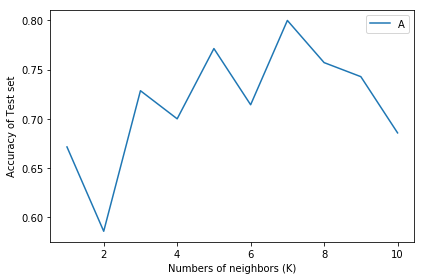

Jaccard Similarity on train_loan: 0.6857142857142857
              precision    recall  f1-score   support

  COLLECTION       0.35      0.53      0.42        15
     PAIDOFF       0.85      0.73      0.78        55

   micro avg       0.69      0.69      0.69        70
   macro avg       0.60      0.63      0.60        70
weighted avg       0.74      0.69      0.71        70



In [114]:
import sklearn 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print("Train size: ", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

import numpy as np
ks=11
accuracy=np.zeros(ks-1)
accuracy
      
for n in range(1,ks):
    neigh1 = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh1.predict(X_test)
    accuracy[n-1]=  metrics.accuracy_score(y_test, yhat)
    #print(accuracy)
accuracy  

print("Maximum accuracy of KNN classifier=",accuracy.max(), "with k=",accuracy.argmax()+1)

plt.plot(range(1,ks),accuracy)
plt.legend('Accuracy')
plt.xlabel('Numbers of neighbors (K)')
plt.ylabel('Accuracy of Test set')
plt.tight_layout()
plt.show()

from sklearn.metrics import jaccard_similarity_score
print("Jaccard Similarity on train_loan:", jaccard_similarity_score(y_test, yhat))

print (classification_report(y_test, yhat))



<h3>Model 2:  KNN by categorizing education data within the same column including the Masters and above data 

Maximum accuracy of KNN classifier= 0.7285714285714285 with k= 9


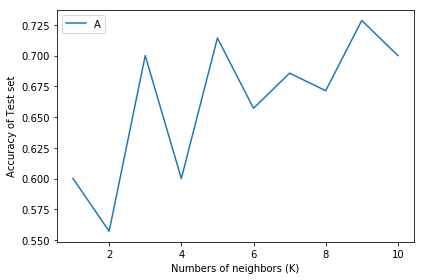

Jaccard Similarity on train_loan: 0.7
              precision    recall  f1-score   support

  COLLECTION       0.20      0.13      0.16        15
     PAIDOFF       0.78      0.85      0.82        55

   micro avg       0.70      0.70      0.70        70
   macro avg       0.49      0.49      0.49        70
weighted avg       0.66      0.70      0.68        70



In [115]:
Feature = df[['Principal','terms','age','Gender','weekend', 'education']].values
Feature[0:5]
education = preprocessing.LabelEncoder()
education.fit(['Bechalor', 'High School or Below', 'Master or Above', 'college'])
Feature[:,5]=education.transform(Feature[:,5])
Feature[0:5]

import numpy as np
ks=11
accuracy=np.zeros(ks-1)
accuracy
      
X_train1, X_test1, y_train1, y_test1 = train_test_split(Feature, y, test_size=0.2, random_state=4)
    
for n in range(1,ks):
    neigh2 = KNeighborsClassifier(n_neighbors=n).fit(X_train1, y_train1)
    yhat = neigh2.predict(X_test1)
    accuracy[n-1]=  metrics.accuracy_score(y_test1, yhat)
    #print(accuracy)
accuracy  

print("Maximum accuracy of KNN classifier=",accuracy.max(), "with k=",accuracy.argmax()+1)

plt.plot(range(1,ks),accuracy)
plt.legend('Accuracy')
plt.xlabel('Numbers of neighbors (K)')
plt.ylabel('Accuracy of Test set')
plt.tight_layout()
plt.show()

from sklearn.metrics import jaccard_similarity_score
print("Jaccard Similarity on train_loan:", jaccard_similarity_score(y_test1, yhat))

print (classification_report(y_test1, yhat))

<h1>Conclusion: <h3>KNN performed best with the given data at k=7 by not dropping masters or above. It gives good accuracy on the splitted test data i.e. 80% but not good for loan_test data where accuracy and f1 score are same i.e. 68%  

<h3> Model 1 evaluation using test set 

In [24]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-06-27 19:51:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-06-27 19:51:11 (362 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [117]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df.head()

test_df['dayofweek'] = df['effective_date'].dt.dayofweek

test_df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

test = test_df[['Principal','terms','age','Gender','weekend']]
#print(test.shape)
test.head()

test = pd.concat([test,pd.get_dummies(test_df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
#print(test.shape)

test= preprocessing.StandardScaler().fit(test).transform(test)

y_test1=test_df['loan_status']
y_test1[0:5]

#y_test1.shape
print(test.shape)
print(X_train.shape)

neigh1 = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
yhat_test = neigh1.predict(test)
accuracy =  metrics.accuracy_score(y_test1, yhat_test)
print("Accuracy on loan_test data:", accuracy)

f1= f1_score(y_test1, yhat_test, average='weighted')
print("F1 score: ",f1)

from sklearn.metrics import jaccard_similarity_score
print("Jaccard Similarity on train_loan:", jaccard_similarity_score(y_test, yhat))

print (classification_report(y_test, yhat))

(54, 9)
(276, 9)
Accuracy on loan_test data: 0.6851851851851852
F1 score:  0.6453810131971051
Jaccard Similarity on train_loan: 0.7
              precision    recall  f1-score   support

  COLLECTION       0.20      0.13      0.16        15
     PAIDOFF       0.78      0.85      0.82        55

   micro avg       0.70      0.70      0.70        70
   macro avg       0.49      0.49      0.49        70
weighted avg       0.66      0.70      0.68        70



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:24: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


# Decision Tree

<h3>Model 1: Decision tree on given data using education categories within the same column, including Masters or above. 

In [104]:
from sklearn.tree import DecisionTreeClassifier

Feature = df[['Principal','terms','age','Gender','weekend', 'education']].values
Feature[0:5]
education = preprocessing.LabelEncoder()
education.fit(['Bechalor', 'High School or Below', 'Master or Above', 'college'])
Feature[:,5]=education.transform(Feature[:,5])
Feature[0:5]

X_train, X_test, y_train, y_test = train_test_split(Feature, y, test_size=.3, random_state=3)

LoanTree=DecisionTreeClassifier(criterion="entropy", max_depth = 3)

LoanTree.fit(X_train, y_train)

yhat=LoanTree.predict(X_test)
yhat[0:5]

print("Accuracy: ", metrics.accuracy_score(yhat, y_test))

from sklearn.metrics import jaccard_similarity_score
print("Jaccard Similarity on train_loan:", jaccard_similarity_score(y_test, yhat))

print (classification_report(y_test, yhat))

f1= f1_score(y_test, yhat, average='micro')
print("F1 score: ",f1)

Accuracy:  0.7403846153846154
Jaccard Similarity on train_loan: 0.7403846153846154
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        27
     PAIDOFF       0.74      1.00      0.85        77

   micro avg       0.74      0.74      0.74       104
   macro avg       0.37      0.50      0.43       104
weighted avg       0.55      0.74      0.63       104

F1 score:  0.7403846153846154


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h3>Model 2: Decision tree on given data using education in different columns discarding masters or above

In [105]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature.shape
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

X_train, X_test, y_train, y_test = train_test_split(Feature, y, test_size=.3, random_state=3)

LoanTree2=DecisionTreeClassifier(criterion="entropy", max_depth = 3)

LoanTree2.fit(X_train, y_train)

yhat=LoanTree2.predict(X_test)
yhat[0:5]

print("Accuracy: ", metrics.accuracy_score(yhat, y_test))

from sklearn.metrics import jaccard_similarity_score
print("Jaccard Similarity on train_loan:", jaccard_similarity_score(y_test, yhat))

print (classification_report(y_test, yhat))

f1= f1_score(y_test, yhat, average='micro')
print("F1 score: ",f1)

Accuracy:  0.6730769230769231
Jaccard Similarity on train_loan: 0.6730769230769231
              precision    recall  f1-score   support

  COLLECTION       0.36      0.33      0.35        27
     PAIDOFF       0.77      0.79      0.78        77

   micro avg       0.67      0.67      0.67       104
   macro avg       0.57      0.56      0.56       104
weighted avg       0.67      0.67      0.67       104

F1 score:  0.6730769230769231


<h1>Conclusion <h3>Taking education categories within the same column including Masters or above gives better results than having them binarized using get_dummies in different columns and discarding Master or above

<h3> Model 1 evaluation using test set 

In [111]:
from sklearn.tree import DecisionTreeClassifier

test_df = pd.read_csv('loan_test.csv')
test_df.head()

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df.head()

test_df['dayofweek'] = df['effective_date'].dt.dayofweek

test_df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

test = test_df[['Principal','terms','age','Gender','weekend']]
#print(test.shape)
#print(test.head())

test = test_df[['Principal','terms','age','Gender','weekend', 'education']].values
test[0:5]
education = preprocessing.LabelEncoder()
education.fit(['Bechalor', 'High School or Below', 'Master or Above', 'college'])
test[:,5]=education.transform(test[:,5])
#print(test[0:5])

y_test1=test_df['loan_status']
y_test1[0:5]

yhat=LoanTree.predict(test)
yhat[0:5]

print("Accuracy for decision tree on test data: ", metrics.accuracy_score(yhat, y_test1))

from sklearn.metrics import jaccard_similarity_score
print("Jaccard Similarity on test_loan:", jaccard_similarity_score(y_test1, yhat))

print (classification_report(y_test1, yhat))

f1= f1_score(y_test1, yhat, average='weighted')
print("F1 score on test data: ",f1)

Accuracy for decision tree on test data:  0.7407407407407407
Jaccard Similarity on test_loan: 0.7407407407407407
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54

F1 score on test data:  0.6304176516942475


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

# Support Vector Machine

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.7       | 0.64        | NA      |
| Decision Tree      | 0.74       | 0.63        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | 0.75       | 0.67        | 0.56       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>